In [1]:
import time 
start = time.time()

# import os
# os.environ["pRT_input_data_path"] = "/home/mvasist/pRT/input_data"

import numpy as np
import pylab as plt
import matplotlib.ticker as mticker

import pymultinest

plt.rcParams['figure.figsize'] = (10, 6)
from petitRADTRANS import Radtrans
from petitRADTRANS import nat_cst as nc 
from petitRADTRANS.retrieval.parameter import Parameter
from petitRADTRANS.retrieval.models import emission_model_diseq

from sbi.inference import SNRE_A, SNRE, prepare_for_sbi, simulate_for_sbi
from sbi.utils.get_nn_models import posterior_nn
from sbi import utils as utils
from sbi.types import Array, OneOrMore, ScalarFloat
from sbi.analysis import pairplot

import torch
import pandas as pd
import sys
import csv

In [31]:
# saved samples 
# ss=[]

# for i in ['200']:  #'100', '50', 
#     # s= pd.read_csv('/home/mvasist/samples/1/'+ i +'ksamples__mlp_e_SBI_1.2Msim_TintLkIRLgLH2OLCH4LCOLCO2LKLH2LHe.csv')   #waiting for this to be saved 
#     s= pd.read_csv('/home/mvasist/samples/1/'+ i +'ksamples__arch_epochs_1.1Msim_TintLkIRLgLH2O11.csv') 
#     ss.append(s.values)


# ss.append(s)
# sss= np.vstack(ss)
# samples = pd.DataFrame(sss)
# samples = torch.tensor(np.array(samples),dtype=torch.float32)

s = pd.read_csv('/home/mvasist/samples_new/samples_testh5.csv', header=None, index_col=0)
samples = torch.tensor(np.array(s),dtype=torch.float32)

In [32]:
samples.size()

torch.Size([1000, 13])

In [5]:
points = torch.cat([torch.ones(1)*0.55,torch.ones(1)*0.,torch.ones(1)*-10, torch.ones(1)*-0.86,
                    torch.ones(1)*-0.65, torch.ones(1)*3.75, torch.ones(1)*1.0, torch.ones(1)*1063.6, 
                     torch.ones(1)*0.5, torch.ones(1)*0.5, torch.ones(1)*0.5, torch.ones(1)*1.39, torch.ones(1)*-7.51])



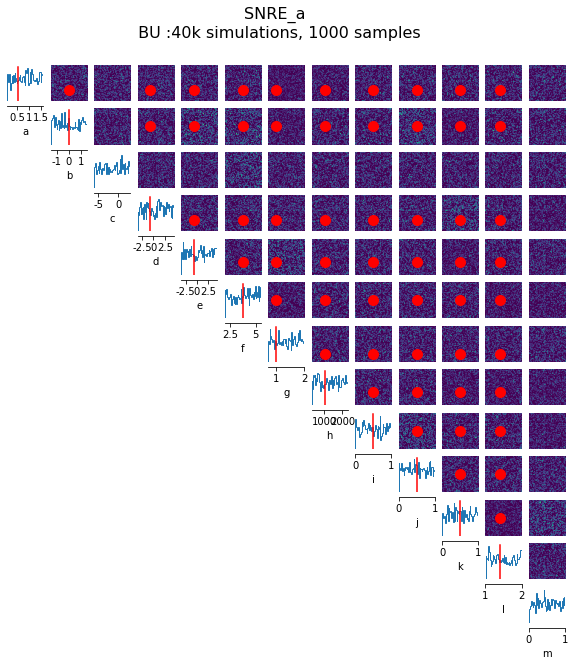

In [41]:
fig, axes = pairplot(samples, points, limits=[[0.1, 1.6], [-1.5, 1.5], [-6.0, 3.0], [-3.5, 4.5], [-3.5, 4.5],[2, 5.5],
                                                         [0.7,2.0], [300,2300], [0,1],[0,1],[0,1], [1,2], [0,1]]  
                        , figsize=(10,10), \
                           labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm'], # 'log ab CH4 \n U(-10,0)', 'log ab CO \n U(-10,0)'],\
                           title= 'SNRE_a \n BU :' + str(40) + 'k simulations, '+ str(1000) + ' samples',\
                          points_colors = ['red'])

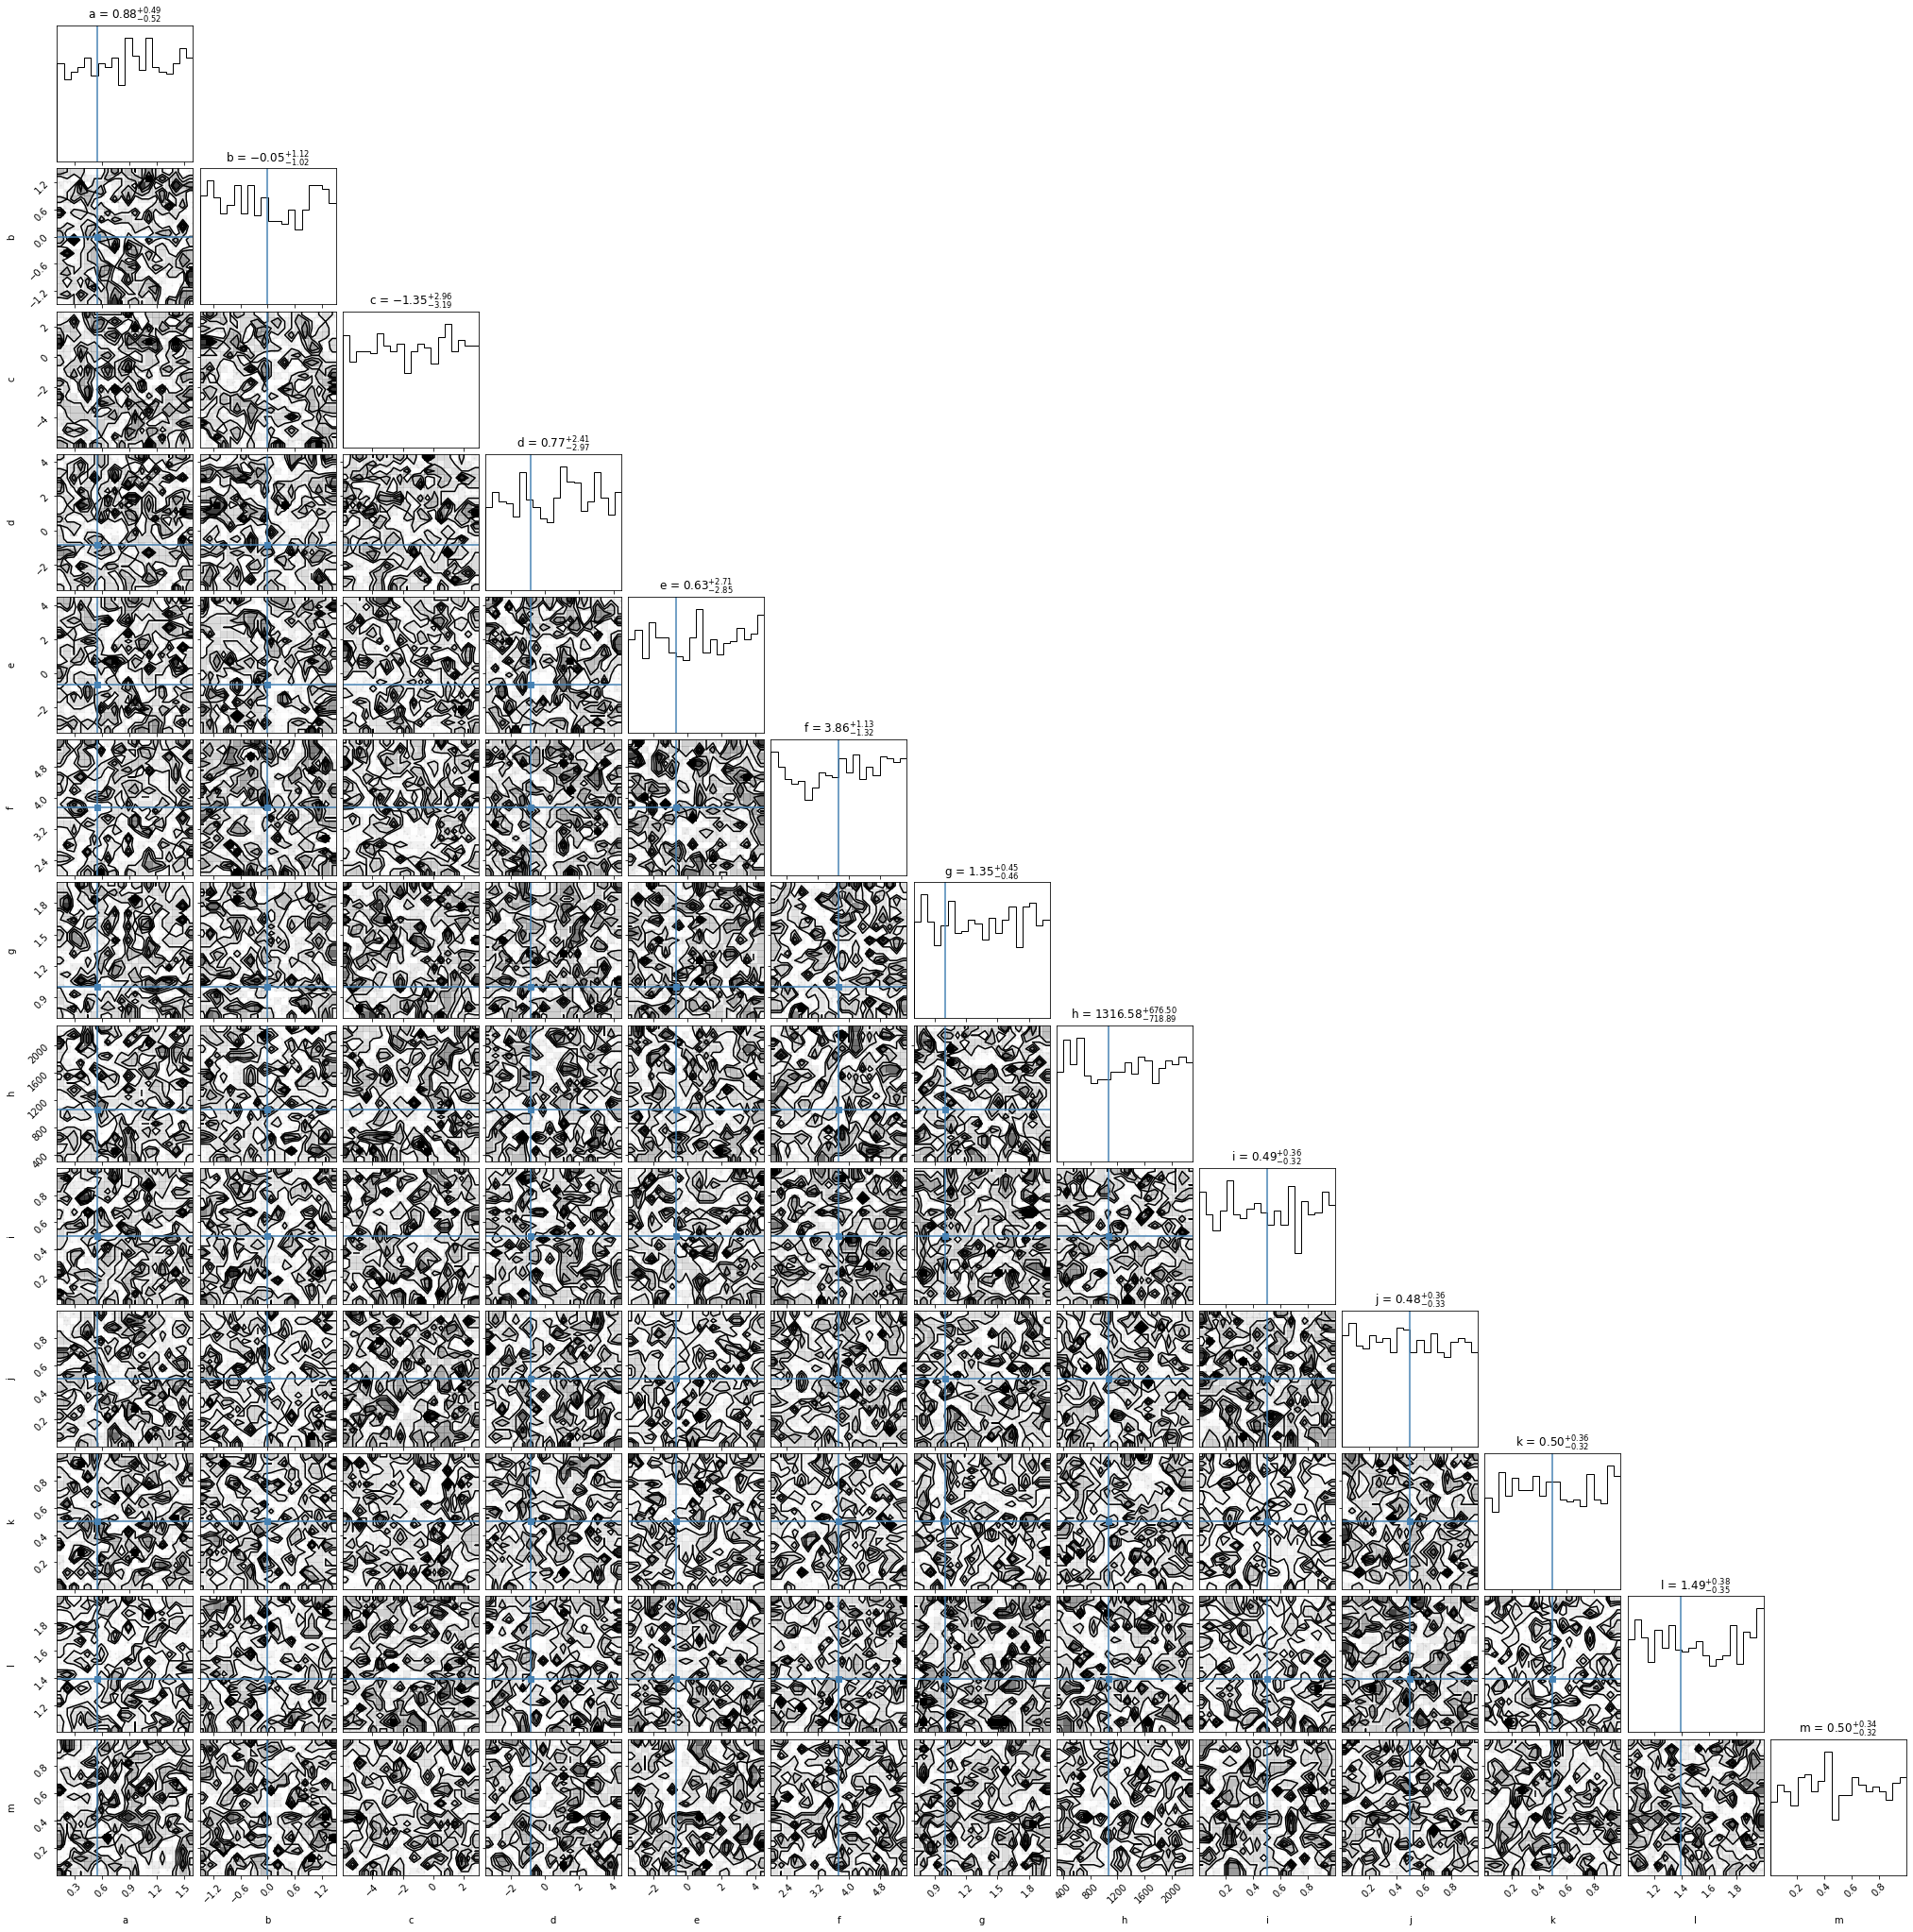

In [9]:
import corner

tmp = corner.corner(samples.numpy(), labels=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm'], 
                truths=[0.55,0.,-10, -0.86, -0.65, 3.75, 1.0, 1063.6, 0.5, 0.5, 0.5, 1.39, -7.51], show_titles=True)   